In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
import joblib

In [98]:
# Cargar datos
datos = pd.read_csv(filepath_or_buffer="/Users/david/Downloads/beisbol.csv", sep=',', low_memory=False)

In [99]:
datos

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [100]:
# Manejo de valores faltantes
datos = datos.dropna()

In [101]:
datos.dropna()

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [102]:
# Exploración de variables y transformación (ejemplo: logaritmo)
datos['log_bateos'] = np.log1p(datos['bateos'])

In [103]:
datos.describe()

,Unnamed: 0,bateos,runs,log_bateos
count,30.000000,30.000000,30.000000,30.000000
mean,14.500000,5523.500000,693.600000,8.616847
std,8.803408,79.873067,82.479088,0.014411
min,0.000000,5417.000000,556.000000,8.597482
25%,7.250000,5448.250000,629.000000,8.603233
50%,14.500000,5515.500000,705.500000,8.615499
75%,21.750000,5575.000000,734.000000,8.626226
max,29.000000,5710.000000,875.000000,8.650149


In [104]:
# Detección y manejo de outliers (eliminación de valores atípicos)
Q1 = datos['runs'].quantile(0.25)
Q3 = datos['runs'].quantile(0.75)
IQR = Q3 - Q1
datos = datos[(datos['runs'] >= Q1 - 1.5 * IQR) & (datos['runs'] <= Q3 + 1.5 * IQR)]

In [105]:
# Normalización/escalado de datos (ejemplo: Min-Max scaling)
scaler = MinMaxScaler()
datos[['bateos', 'runs']] = scaler.fit_transform(datos[['bateos', 'runs']])

C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

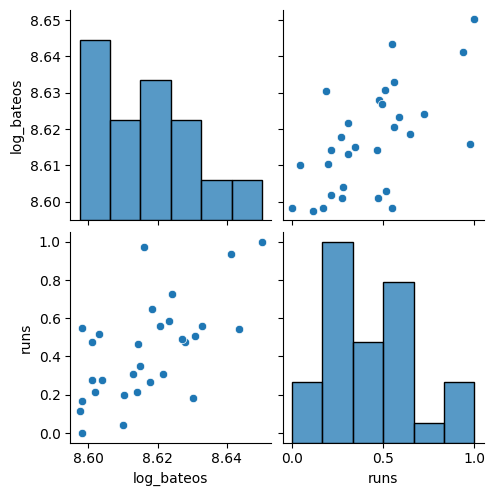

In [106]:
# Visualización de las transformaciones
sns.pairplot(datos[['log_bateos', 'runs']])
plt.show()

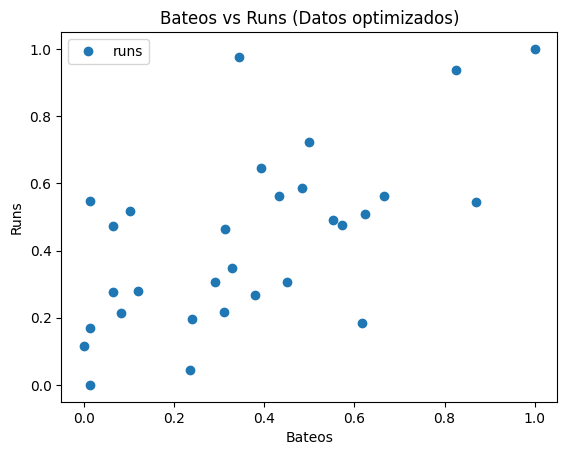

In [107]:
# Visualización de datos originales
datos.plot(x='bateos', y='runs', style='o')
plt.title('Bateos vs Runs (Datos optimizados)')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.show()

In [108]:
# Datos de entrada y salida
X = datos['bateos'].values.reshape(-1, 1)
y = datos['runs'].values.reshape(-1, 1)

In [109]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Crear modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

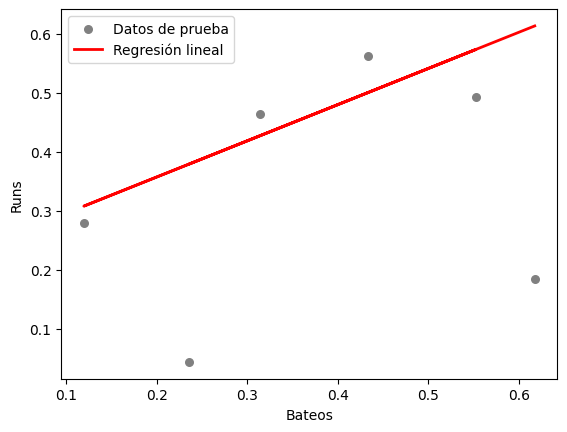

In [111]:
# Visualización de la regresión lineal en el gráfico de dispersión
plt.scatter(X_test, y_test, color='gray', s=30, label='Datos de prueba')
plt.plot(X_test, modelo.predict(X_test), color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [112]:
# Métricas adicionales
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
pearson_corr, _ = pearsonr(y_test.flatten(), y_pred.flatten())

In [113]:
print('Coeficiente de determinación (R^2):', r2)
print('Coeficiente de correlación de Pearson:', pearson_corr)

Coeficiente de determinación (R^2): -0.5174837911123757
Coeficiente de correlación de Pearson: 0.26906679798031974


In [114]:
# Guardar el modelo entrenado para su uso futuro
joblib.dump(modelo, 'modelo_regresion_lineal.pkl')

['modelo_regresion_lineal.pkl']

C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


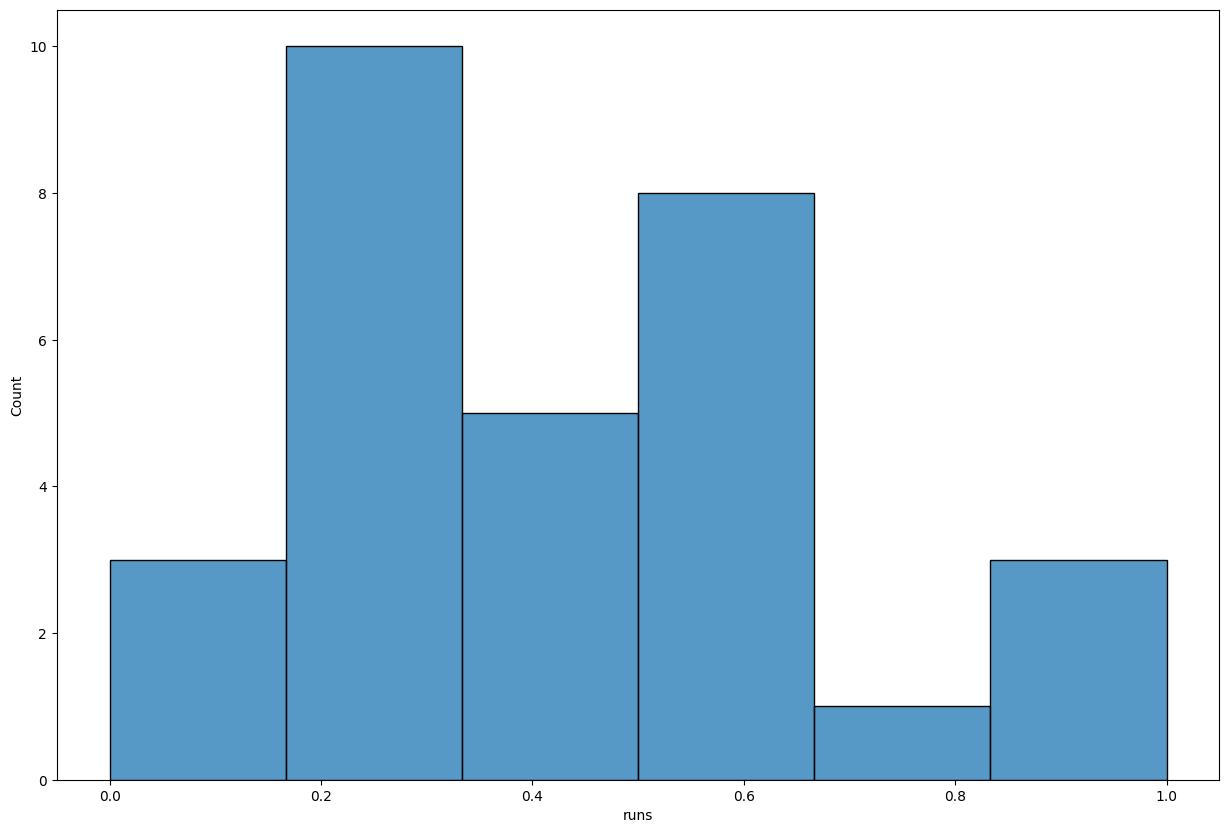

In [115]:
# Visualización del histograma
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.histplot(datos['runs'], kde=False)
plt.show()

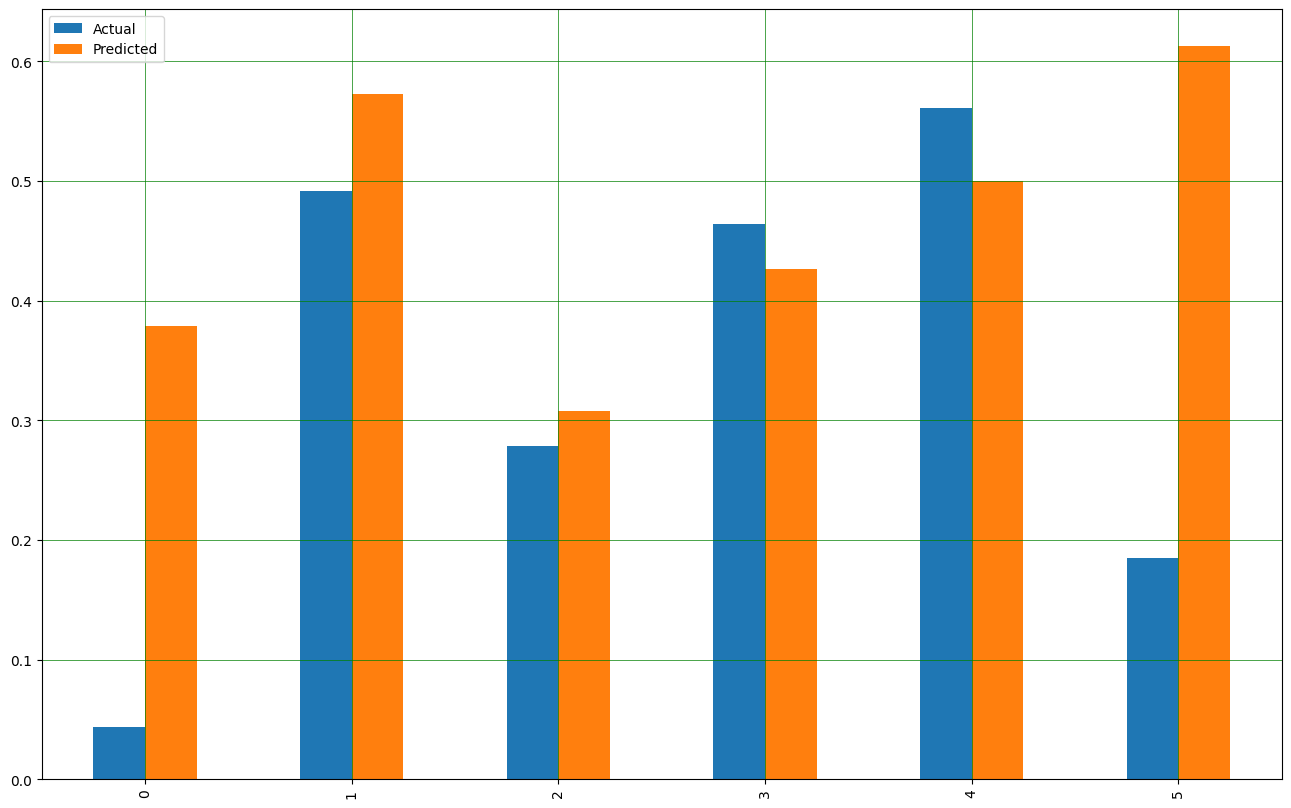

In [116]:
# Visualización de datos predichos vs reales
datos2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
datos2.head(25).plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

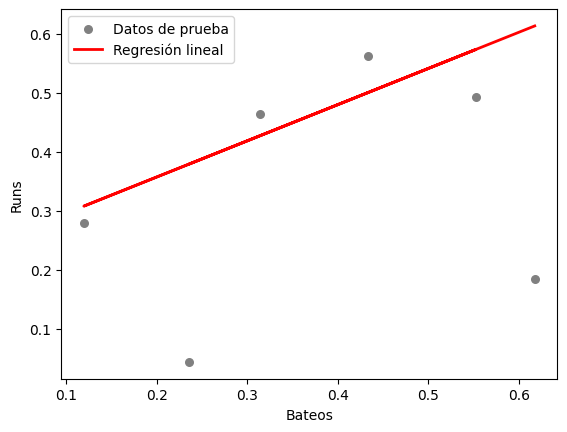

In [117]:
# Visualización de la dispersión de datos de prueba y predichos
plt.scatter(X_test, y_test, color='gray', s=30, label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [118]:
# Métricas de error
print('Error Absoluto Medio:', mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio:', mean_squared_error(y_test, y_pred))
print('Raíz del error cuadrático medio:', np.sqrt(mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 0.16179197705792514
Error Cuadrático Medio: 0.051296426254817125
Raíz del error cuadrático medio: 0.22648714368550177


In [119]:
#coeficiente de determinación r2
r2=modelo.score(X_test,y_test)

In [120]:
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = -0.5174837911123757


In [121]:
# definiendo la  evaluacion
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [131]:
# Crear modelo de regresión lineal sin normalize
modelo = LinearRegression()

In [132]:
# Definiendo el espacio de búsqueda
space = dict()
space['copy_X'] = [True, False]
space['positive'] = [True, False]
space['fit_intercept'] = [True, False]

In [140]:
# Definiendo la búsqueda
search = GridSearchCV(modelo, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [141]:
# Ejecutando la búsqueda
result = search.fit(X, y)

In [142]:
# Resumen de resultados
print('Mejor puntuación: %s' % result.best_score_)
print('Mejores Hiperparametros: %s' % result.best_params_)

Mejor puntuación: -0.17210273392593833
Mejores Hiperparametros: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [143]:
# Optimización del modelo
modelo = LinearRegression(fit_intercept=True, copy_X=True)
modelo.fit(X=X_train.reshape(-1, 1), y=y_train)

LinearRegression()

In [144]:
#Para obtener el intercepto:
print("Intercepto:",modelo.intercept_)
#Para obtener la pendiente
print("Coeficiente:",modelo.coef_)
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercepto: [0.23452641]
Coeficiente: [[0.61249938]]
Coeficiente de determinación R^2: 0.3613207766000789
